# PHYS 576 --- Initial Exploration of Data
### Joshua LaBounty
### 10/3/2018

This notebook will be used to complete the assignment detailed here: https://canvas.uw.edu/courses/1224622/assignments/4408632

In [48]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

%matplotlib inline

Here we look at a portion of the '9 day' dataset, and will examine the 'background' signals of the lost muons (what I would consider to be a true background) and the laser sync pulses (which we have added into the experiment on purpose, but which are not data we are interested in measuring for the final results)

These files contain a root TTree in which the data for the clusters is stored. Associated with each cluster is a mean energy, its reconstructed position within the calorimeter, and various other parameters. 

In [68]:
#this is the full data file
f = r.TFile("./data/gm2offline_ana_10868087_16370.00284.root")
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_10868087_16370.00284.root	
 TFile*		./data/gm2offline_ana_10868087_16370.00284.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirector

In [71]:
t = f.Get("farline/eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :    11618 : Total =      1713646918 bytes  File  Size = 1174059255 *
*        :          : Tree compression factor =   1.46                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    11618 : Total  Size=      50211 bytes  File Size  =       4514 *
*Baskets :       35 : Basket Size=      49569 bytes  Compression=  10.90     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    11618 : Total  Size=      50328 bytes  File Size  =       4735 *
*Baskets :       35 : Basket Size=      49569 bytes  Compression=  10.41     *
*...................................................

In [69]:
#this is the file containing additional analysis of the lost muons. This is from a different subset of runs from the first file
fMuon = r.TFile("./data/gm2offline_ana_run16355.root")
fMuon.cd("CoincidenceFinderLM")
fMuon.ls()

TFile**		./data/gm2offline_ana_run16355.root	
 TFile*		./data/gm2offline_ana_run16355.root	
  TDirectoryFile*		CoincidenceFinderLM	CoincidenceFinderLM (CoincidenceFinderLM) folder
   KEY: TTree	CoincLM;3	CoincLM
   KEY: TTree	CoincLM;2	CoincLM
   KEY: TH1D	caloNumdouble_;1	Double Coincidence: hits vs calo number - double/singles = 0.1056
   KEY: TH1D	caloNumtriple_;1	Triple Coincidence: hits vs calo number - triple/singles = 0.0205
   KEY: TH2D	clusterTimecaloNumdouble_;1	Double Coincidence: cluster time vs calo num
   KEY: TH2D	clusterTimecaloNumtriple_;1	Triple Coincidence: cluster time vs calo num
   KEY: TH1D	coincDoubleTriple;1	Ratio of double (0.1056) and triple (0.0205) coincidence LM candidates to singles
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [70]:
tMuon = fMuon.Get("CoincidenceFinderLM/CoincLM")
tMuon.Print()

******************************************************************************
*Tree    :CoincLM   : CoincLM                                                *
*Entries :  1918500 : Total =       294562616 bytes  File  Size =   75600010 *
*        :          : Tree compression factor =   3.90                       *
******************************************************************************
*Br    0 :coincidenceLevel : coincidenceLevel/i                              *
*Entries :  1918500 : Total  Size=    7684313 bytes  File Size  =      55621 *
*Baskets :       94 : Basket Size=    6814720 bytes  Compression= 138.11     *
*............................................................................*
*Br    1 :caloNum   : vector<int>                                            *
*Entries :  1918500 : Total  Size=   34814822 bytes  File Size  =    3292300 *
*Baskets :      505 : Basket Size=   25600000 bytes  Compression=  10.57     *
*...................................................

Lets see what runs and subruns we have in the first data file, and which we have in the second

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


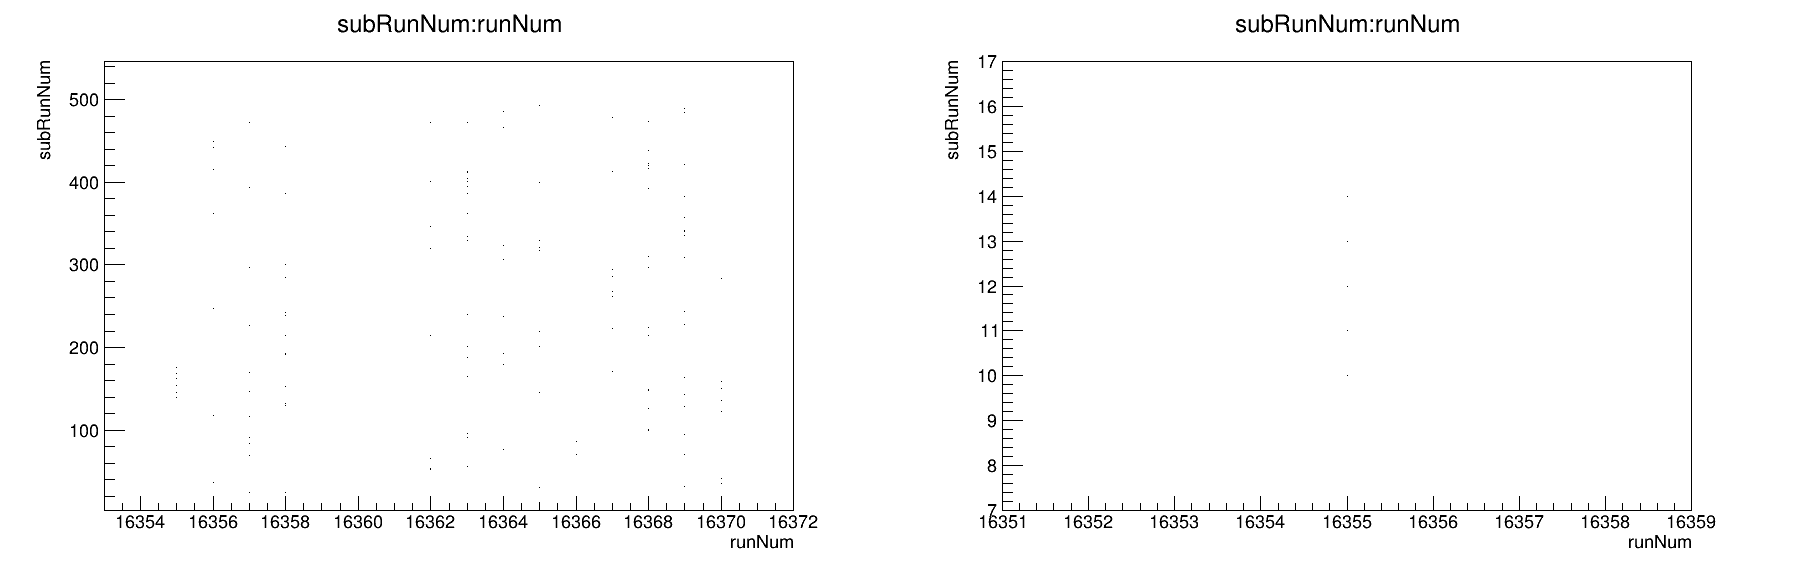

In [88]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)
t.Draw("subRunNum:runNum")
c.cd(2)
tMuon.Draw("subRunNum:runNum")
c.Draw()

---


Lets first look at the lost muons in the true data file. These we expect to peak at ~170 MeV.

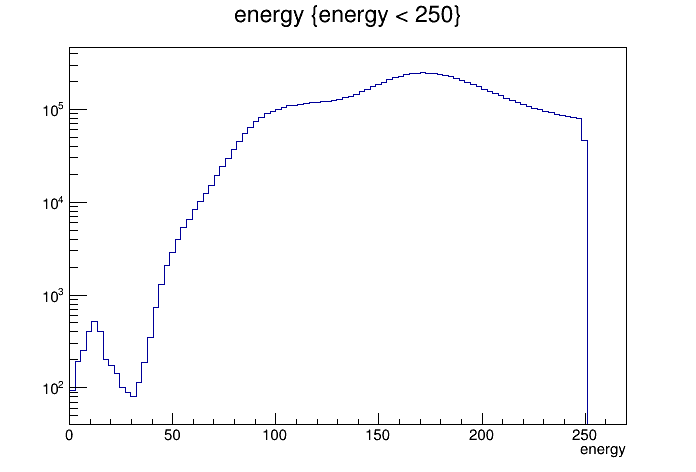

In [64]:
c = r.TCanvas()
t.Draw("energy","energy < 250","")
c.SetLogy()
c.Draw()

Now lets compare to the lost muon only data file, where we have (attempted) to strip out any other signals. The coincidence level here refers to the number of calorimeters in which the muons are detected (after a certain delay between the signals) and is how these muons are identified.

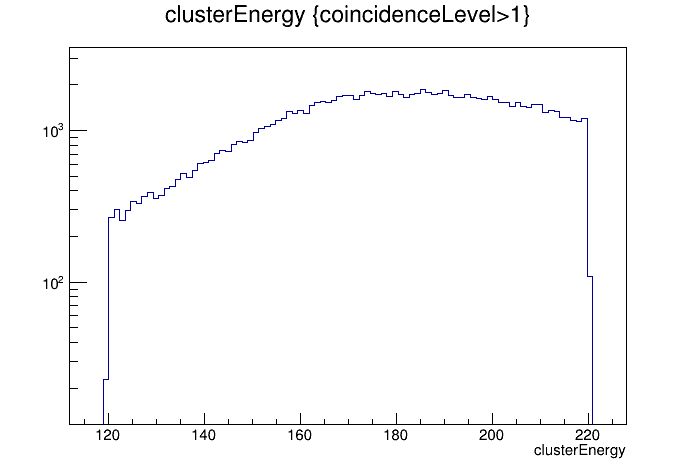

In [85]:
c = r.TCanvas()
tMuon.Draw("clusterEnergy","coincidenceLevel>1","")
c.SetLogy()
c.Draw()

This distribution in energy does not appear to be gaussian. Let's also take a look at the position distribution of these muons

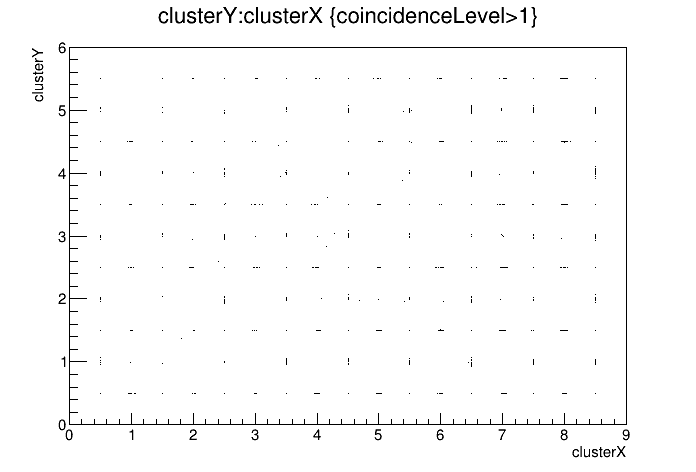

In [104]:
c = r.TCanvas()
tMuon.Draw("clusterY:clusterX","coincidenceLevel>1","")
c.Draw()

Unfortunately, there doesnt appear to be enough information to come to a meaningful conclusion

---

We can also take a look at the laser signals which are present in the first (larger file). Each calorimeter has its own laser pulse, so we will need to make 24 seperate histograms in order to keep everything straight.

[<ROOT.TH1D object ("h1") at 0x7fa68b6217c0>, <ROOT.TH1D object ("h2") at 0x7fa837482a10>, <ROOT.TH1D object ("h3") at 0x7fffe1c54c10>, <ROOT.TH1D object ("h4") at 0x7fffe22f6c60>, <ROOT.TH1D object ("h5") at 0x7fa837483c70>, <ROOT.TH1D object ("h6") at 0x7fffe1926f60>, <ROOT.TH1D object ("h7") at 0x7fa8ecaab450>, <ROOT.TH1D object ("h8") at 0x7fffe1929700>, <ROOT.TH1D object ("h9") at 0x7fa8eca9c2f0>, <ROOT.TH1D object ("h10") at 0x7fa8374e06e0>, <ROOT.TH1D object ("h11") at 0x7fa8ecaca7b0>, <ROOT.TH1D object ("h12") at 0x7fa837490fb0>, <ROOT.TH1D object ("h13") at 0x7fa8374aef20>, <ROOT.TH1D object ("h14") at 0x7fffe2308f20>, <ROOT.TH1D object ("h15") at 0x7fa837ede910>, <ROOT.TH1D object ("h16") at 0x7fa8374b94e0>, <ROOT.TH1D object ("h17") at 0x7fffe231f750>, <ROOT.TH1D object ("h18") at 0x7fa8374ccf40>, <ROOT.TH1D object ("h19") at 0x7fa8374bd250>, <ROOT.TH1D object ("h20") at 0x7fa8374cc090>, <ROOT.TH1D object ("h21") at 0x7fa8375062e0>, <ROOT.TH1D object ("h22") at 0x7fa8374dc43

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Rep

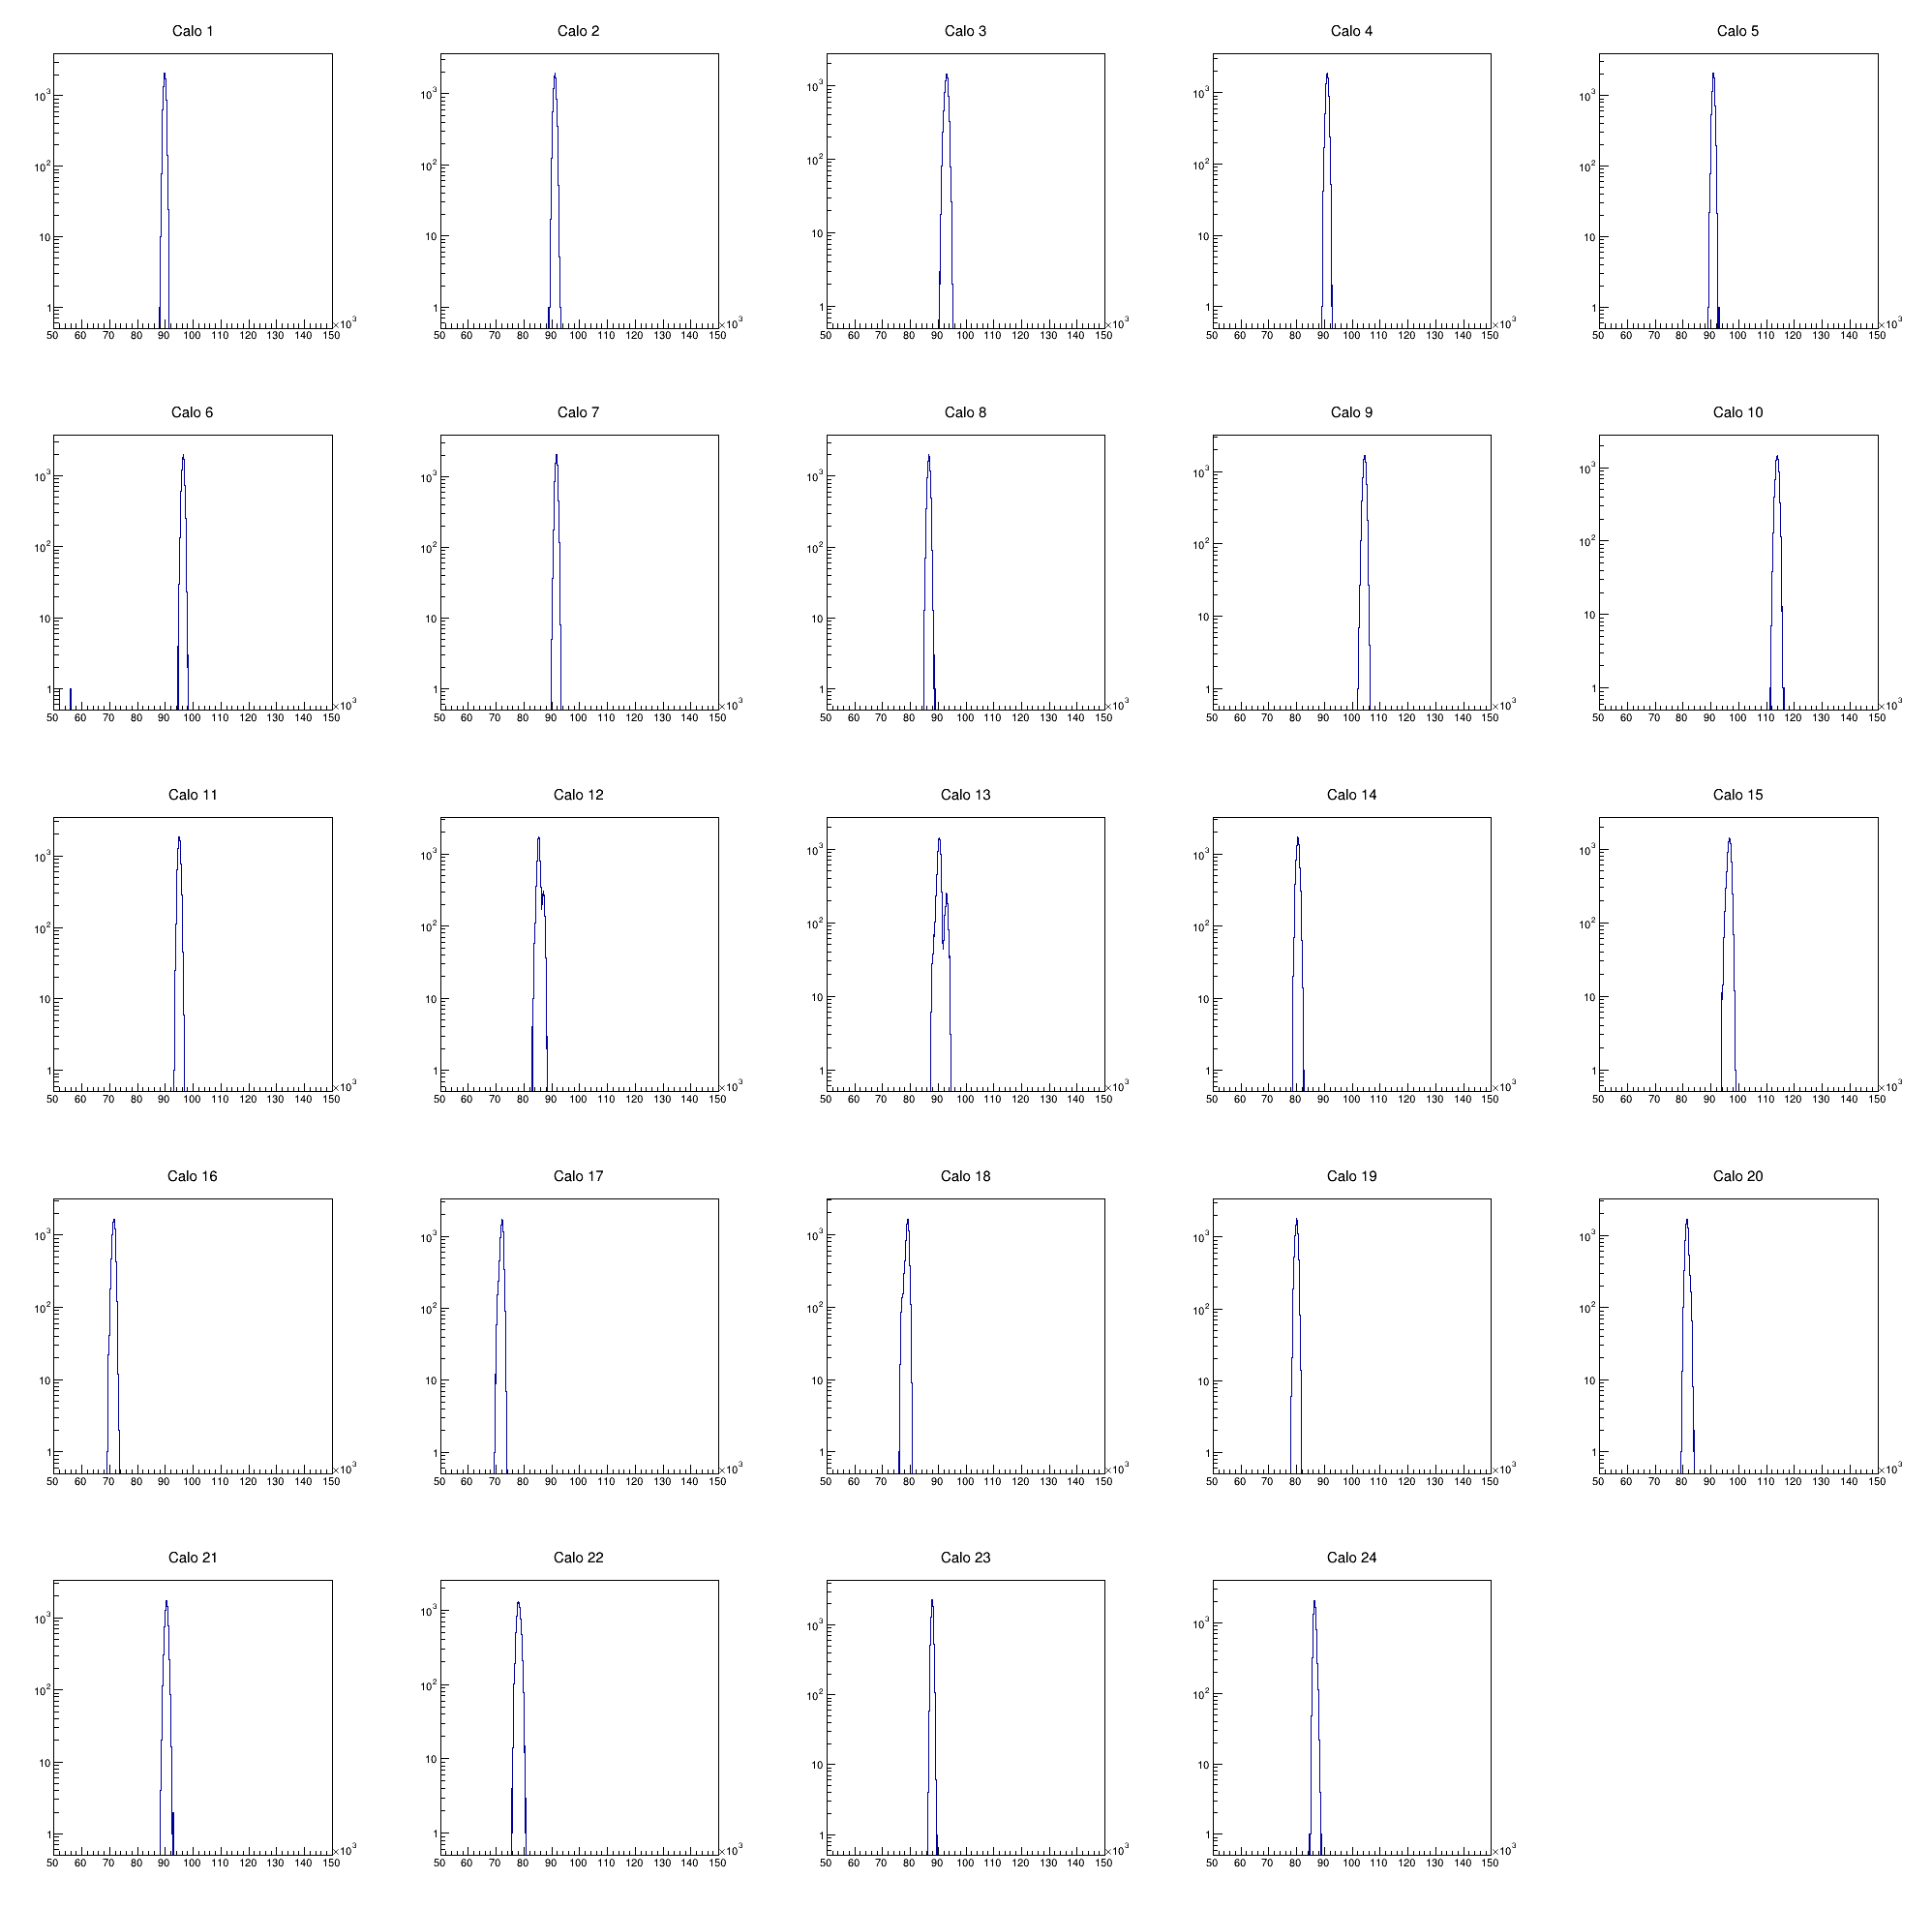

In [108]:
c2 = r.TCanvas("c2","c2",2000,2000)
c2.Divide(5,5)

histVec = []

for i in range(1,25):
    hi = r.TH1D("hi","Calo "+str(i),1000,50000,150000)
    t.Draw("energy>>hi","energy>40000 && caloNum=="+str(i),"goff")
    histVec.append( hi.Clone("h"+str(i)) )
    
print(histVec)

for i, hi in enumerate(histVec):
    c2.cd(i+1)
    r.gPad.SetLogy()
    hi.Draw()
c2.Draw()

We can also attempt to fit these histograms with a gaussian distribution

89756.83852642452
91125.67137200895
92948.9628163195
90942.15871922878
90898.03752797384
96389.46032019281
91667.03821656051
86649.62988466173
104371.55706662076
113771.87984162506
94989.61525219487
85490.36409020485
90654.13152005509
80425.29264933724
96550.03873300052
71434.04200378722
71978.11155104148
78822.4048889654
79911.18092614909
81401.54932002065
90398.82079531762
78126.97968669306
87856.91599242555
86510.45360647271


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


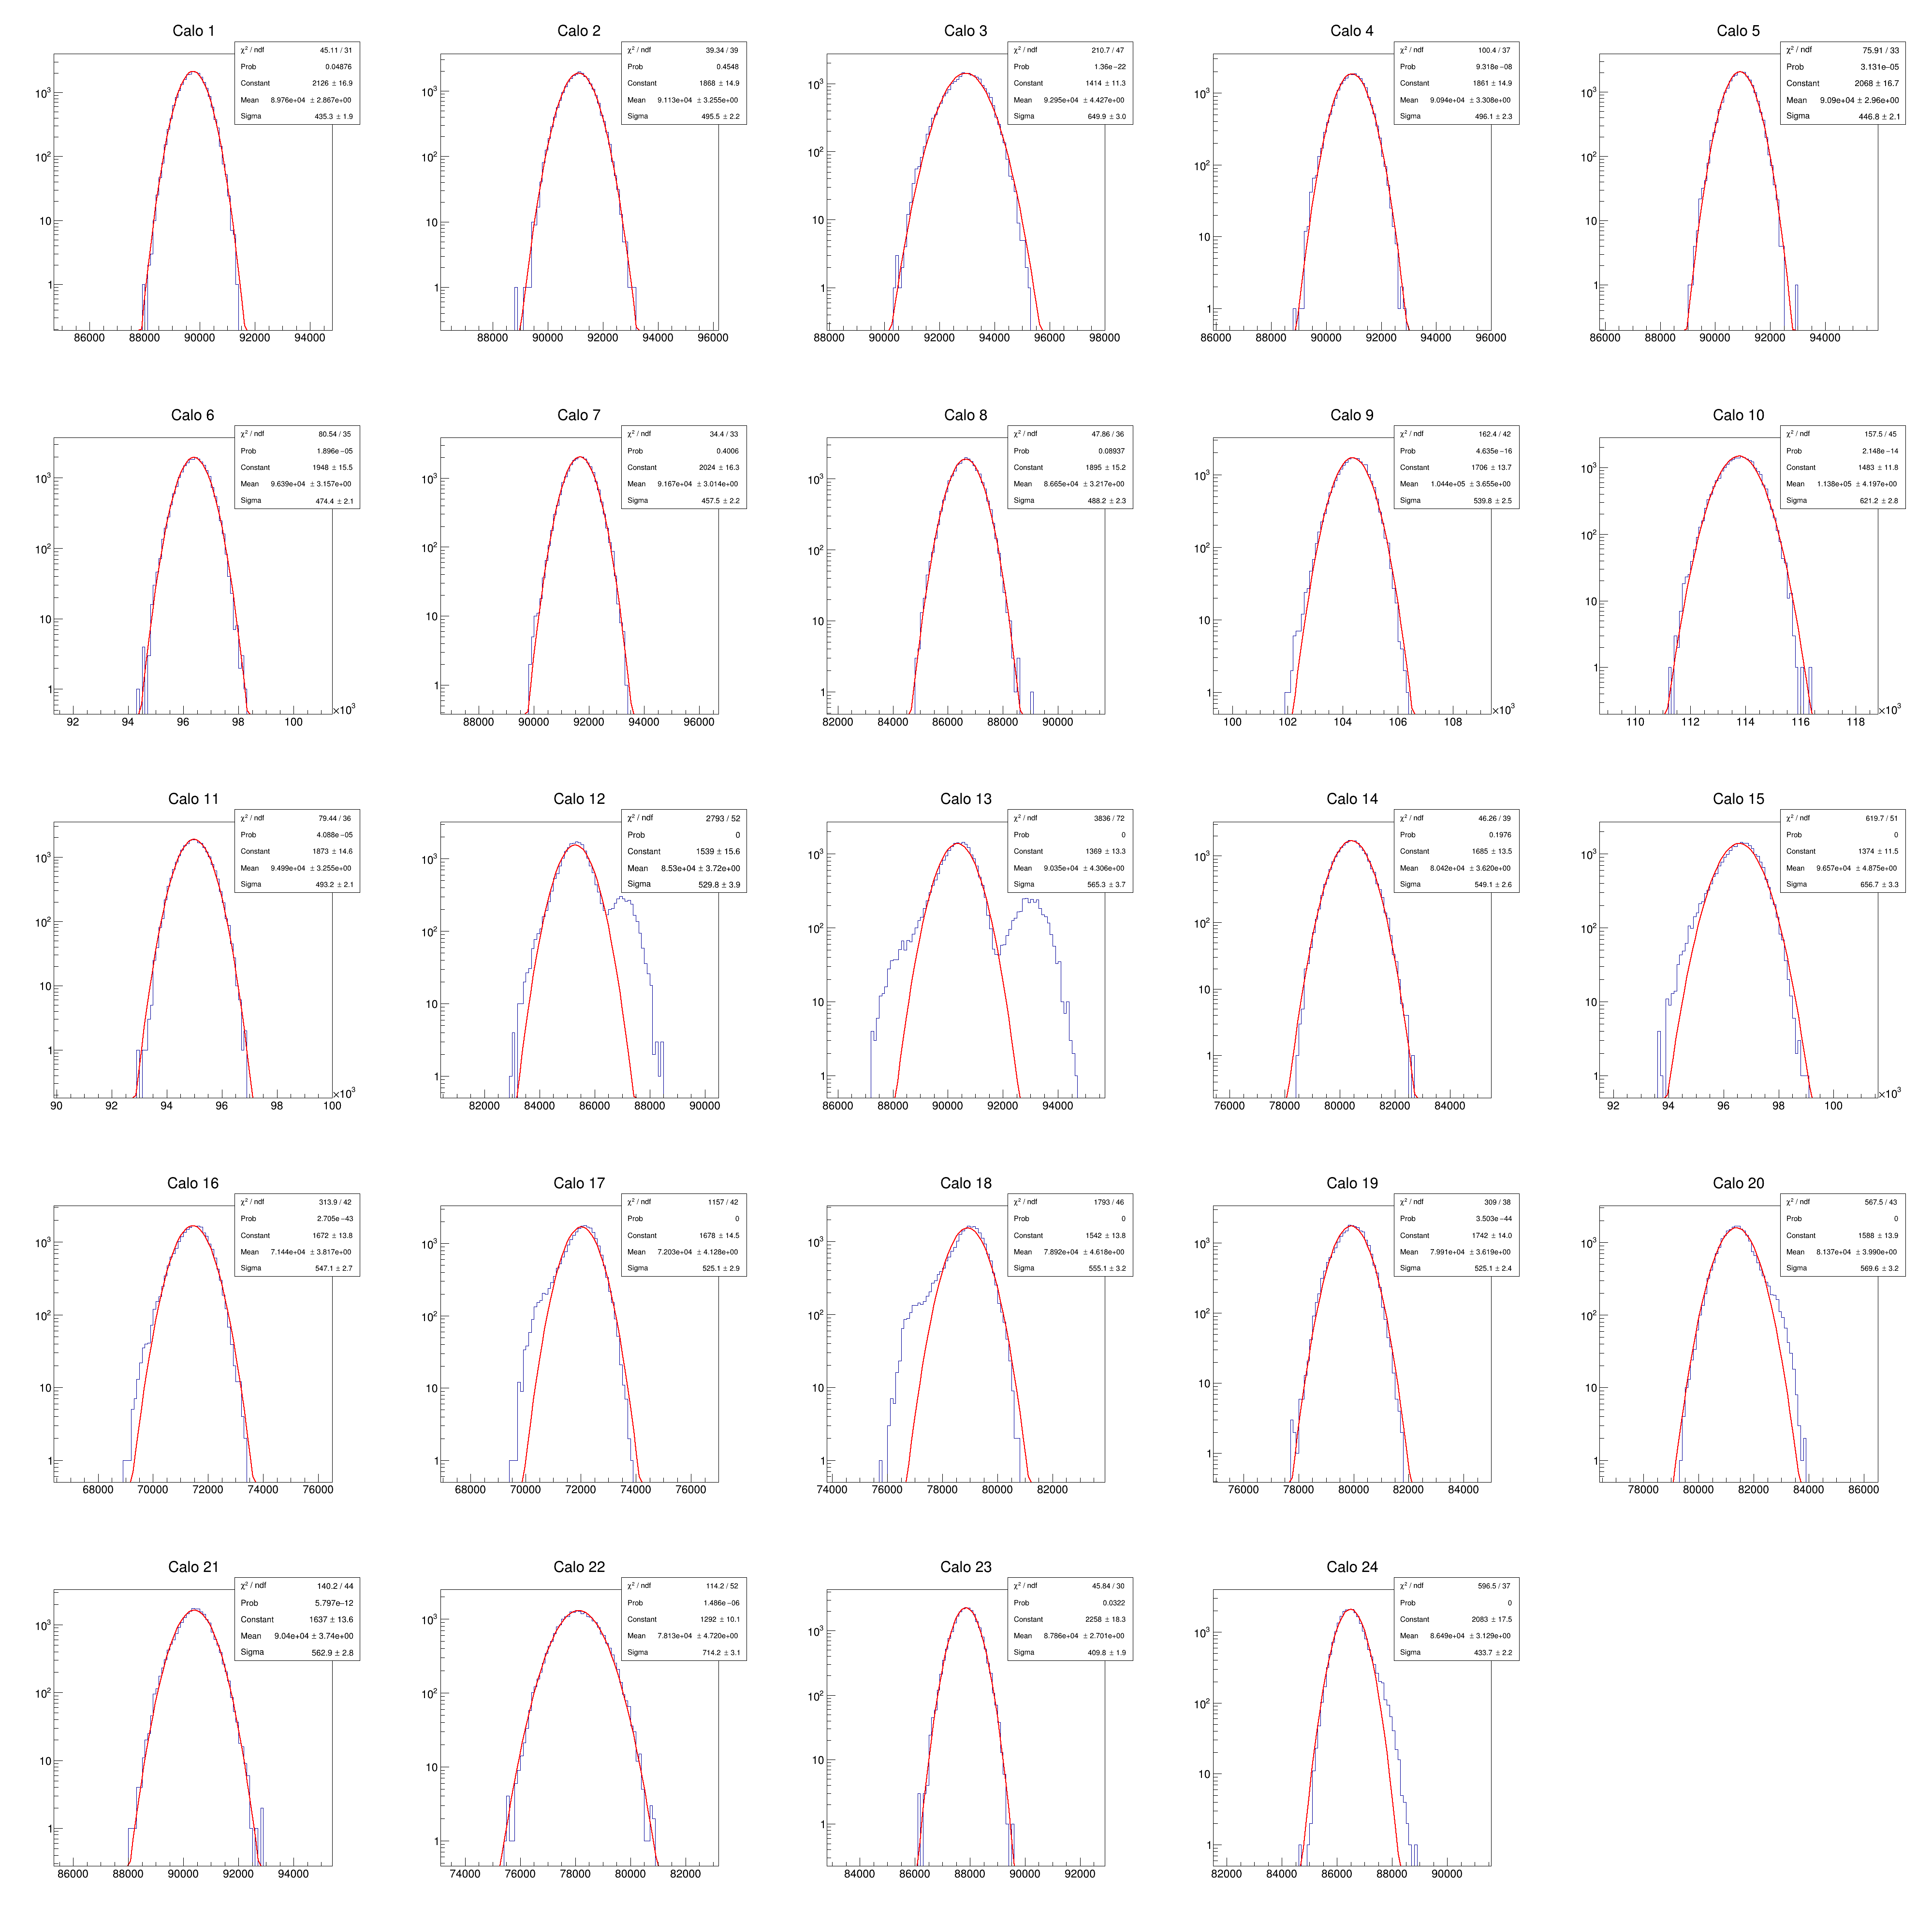

In [113]:
c2 = r.TCanvas("c2","c2",4000,4000)
c2.Divide(5,5)

chisqVec = []

for i, hi in enumerate(histVec):
    c2.cd(i+1)
    r.gPad.SetLogy()
    
    func = r.TF1("func","gaus",50000,150000)
    hi.Fit("func","EMQ")
    
    chisqVec.append( ( func.GetChisquare() , func.GetNDF() ) )
    
    print(hi.GetMean())
    hi.GetXaxis().SetRangeUser( hi.GetMean() - 5000 , hi.GetMean() + 5000 )
    
    hi.Draw()
c2.Draw()

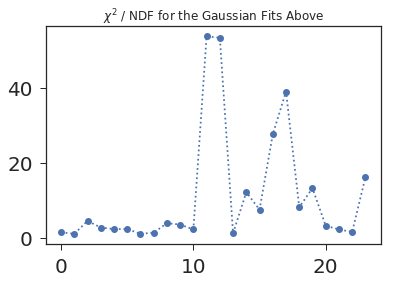

In [122]:
plt.plot([x[0] / x[1] for x in chisqVec],':o')
plt.title("$\chi^2$ / NDF for the Gaussian Fits Above")
plt.show()

---

Now we can take a look at all of the data, including the real positron data in which g-2 is encoded. Lets see the position distribution of all of the clusters

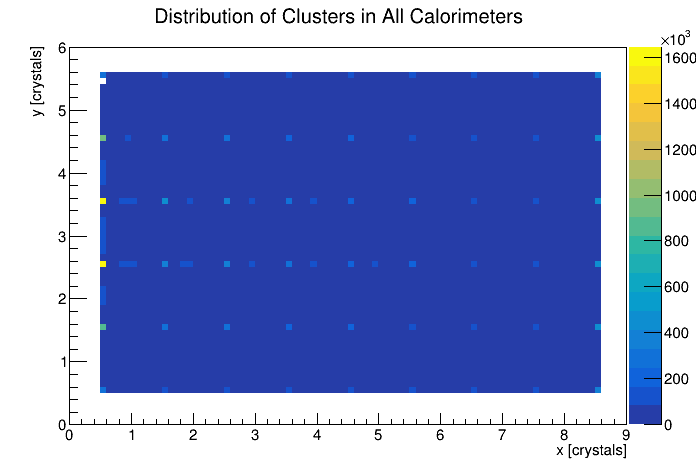

In [5]:
h1 = r.TH2D("h1","Distribution of Clusters in All Calorimeters; x [crystals]; y [crystals]",90,0,9,60,0,6)
c2 = r.TCanvas()
t.Draw("y:x>>h1")
h1.Draw("COLZ")
c2.Draw()

We can see that there is are some spots which are quite hot, but the real pattern starts to emerge when we view this on a log scale

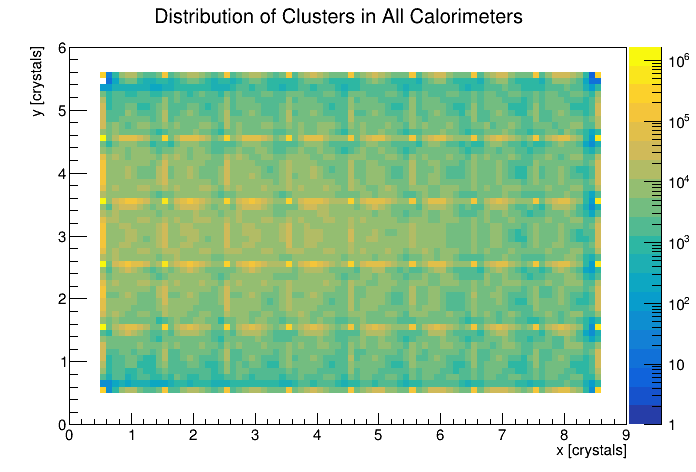

In [6]:
c2.SetLogz()
c2.Draw()

The reconstructed positions are very highly weighted towards the center of the crystals (the 0.5 marks) and are disfavored at the edges. We can also look and see the x and y-projections of this plot.

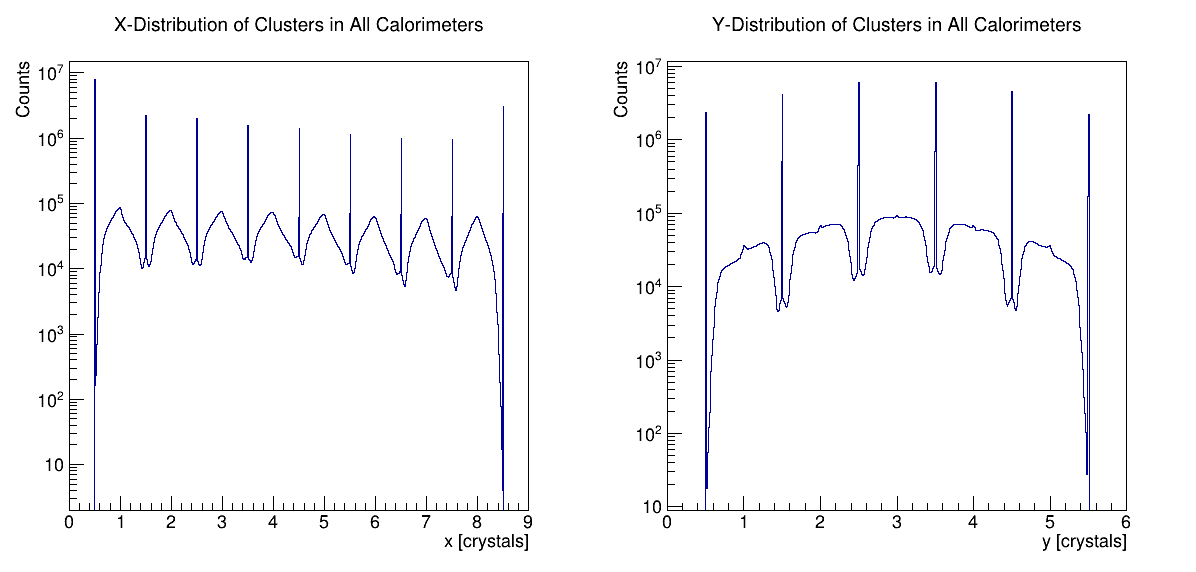

In [7]:
c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)

c3.cd(1)
r.gPad.SetLogy()
h2 = r.TH1D("h2","X-Distribution of Clusters in All Calorimeters; x [crystals]; Counts",900,0,9)
t.Draw("x>>h2","","goff")
h2.Draw()

c3.cd(2)
r.gPad.SetLogy()
h3 = r.TH1D("h3","Y-Distribution of Clusters in All Calorimeters; y [crystals]; Counts",600,0,6)
t.Draw("y>>h3","","goff")
h3.Draw()

c3.Draw()

Lets look at only one crystal

In [8]:
h4 = r.TH1D("h4","X-Distribution of Clusters in All Calorimeters; x [crystals]; Counts",200,2,3)
t.Draw("x>>h4","y > 2 && y< 3","goff")

12298353

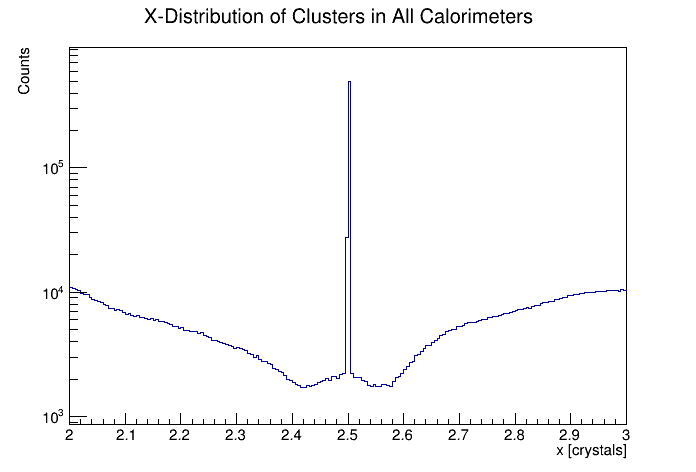

In [9]:
c4 = r.TCanvas()
h4.Draw()
c4.SetLogy()
c4.Draw()

Now for the real money plot, we have already generated a plot of the calorimeter data vs. time in order to extract the omega_a frequency

In [98]:
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

#lets also rescale the x-axis from clock ticks into (approximate) microseconds
#print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
#print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

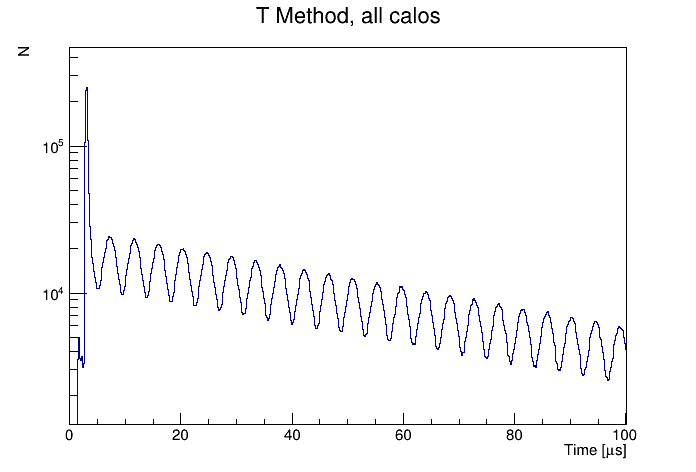

In [99]:
c2 = r.TCanvas()
allCaloWiggle.GetXaxis().SetRangeUser(0,100)
allCaloWiggle.Draw()
c2.SetLogy()
c2.Draw()

Lets perform a fourier transform on this plot and see what frequencies we can spot

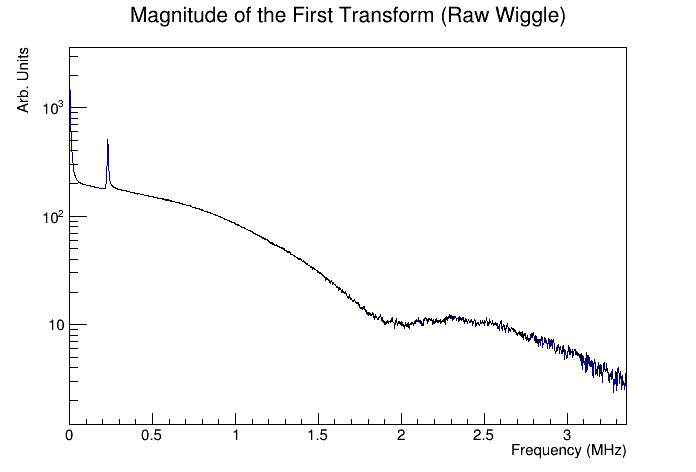

In [12]:
c5 = r.TCanvas()
hxformRaw = r.TH1D()
hxformRaw = 0
r.TVirtualFFT.SetTransform(0)
hxformRaw = allCaloWiggle.FFT(hxformRaw,"MAG P")
hxformRaw.SetTitle("Magnitude of the First Transform (Raw Wiggle)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxformRaw.GetEntries()
hxformRaw.Scale(1/normXform)
#c2.SetLogy()
hxformRaw.GetXaxis().SetTitle("Frequency (MHz)")
hxformRaw.GetYaxis().SetTitle("Arb. Units")
hxformRaw.Draw("HIST P0 L")

Npart = allCaloWiggle.GetSize() - 2
minBinCenter = allCaloWiggle.GetXaxis().GetBinCenter(0)
maxBinCenter = allCaloWiggle.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
#    print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
#    print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
#    print(limmax,limmaxMHz)
nbins = allCaloWiggle.GetSize() - 2

hxformRaw.SetBins(Npart,0,limmaxMHz)
hxformRaw.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c5.SetLogy()

c5.Draw()

We can already see our target, but it is superimposed on a good deal of background noise (mostly the exponential decay, but there are other frequencies present as well)

Let's see if we can generate a series of correllation plots from the variables saved in this TTree 

In [39]:
df = read_root("./data/gm2offline_ana_10868087_16370.00284.root","farline/eventTree")#,flatten=['energy'])

In [15]:
df.describe()

,runNum,subRunNum,eventNum,midasSerialNum,clockCounter,trigNum,bunchNum,runStartUnixTimeSeconds,ctag
count,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,1.161800e+04,11618.000000
mean,16363.450250,234.755896,108.137201,48176.122999,2331.612599,48176.122999,3.503615,1.525471e+09,277.166380
std,4.770102,142.347852,64.611602,29150.334719,1419.676248,29150.334719,2.291797,1.819730e+04,83.567374
min,16355.000000,3.000000,1.000000,600.000000,24.927871,600.000000,0.000000,1.525440e+09,0.000000
25%,16358.000000,123.000000,54.000000,25133.500000,1162.279086,25133.500000,2.000000,1.525453e+09,260.000000
50%,16364.000000,220.000000,107.000000,45764.500000,2219.615131,45764.500000,4.000000,1.525470e+09,300.000000
75%,16368.000000,357.000000,159.000000,72815.500000,3564.103566,72815.500000,6.000000,1.525489e+09,324.000000
max,16370.000000,493.000000,352.000000,106463.000000,5149.988328,106463.000000,7.000000,1.525499e+09,419.000000


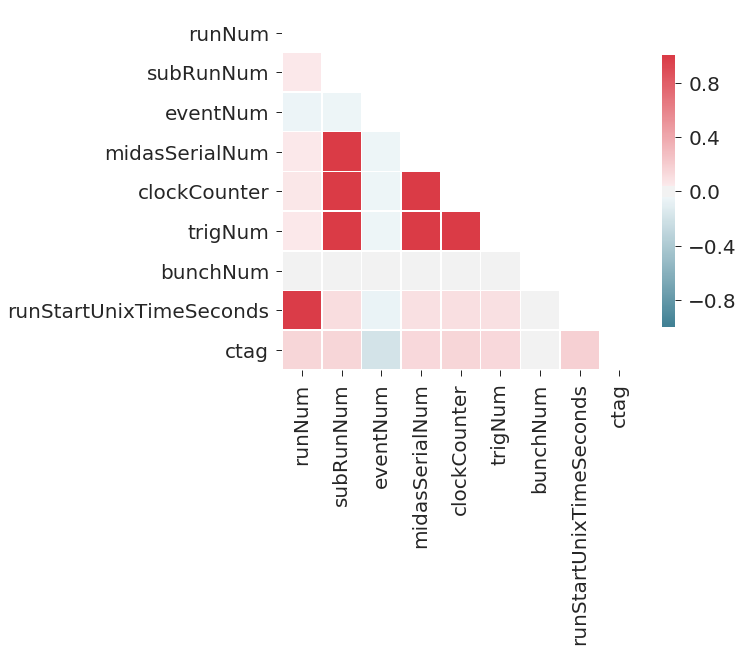

In [16]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

plt.show()

Because of the file structure, only the uninteresting variables show up in this plot. In order to see things like energy, positions, and time we need to namually unpack some of the data

In [2]:
file = uproot.open("./data/gm2offline_ana_10868087_16370.00284.root")

In [3]:
file.keys()

[b'farline;1']

In [4]:
tree = file["farline/eventTree"]

In [5]:
tree.keys()

[b'runNum',
 b'subRunNum',
 b'eventNum',
 b'midasSerialNum',
 b'clockCounter',
 b'trigNum',
 b'bunchNum',
 b'runStartUnixTimeSeconds',
 b'ctag',
 b'caloNum',
 b'energy',
 b'time',
 b'x',
 b'y']

In [6]:
arrX = tree["x"].array().flatten()
arrY = tree["y"].array().flatten()
arrEnergy = tree["energy"].array().flatten()
arrTime = tree["time"].array().flatten()
arrCaloNum = tree["caloNum"].array().flatten()

In [7]:
dfUnpacked = pandas.DataFrame({'x':arrX,'y':arrY,'energy':arrEnergy,'time':arrTime,"calo":arrCaloNum})
dfUnpacked.head()

,x,y,energy,time,calo
0,4.458734,3.336363,89977.707304,-19395.769271,1
1,0.500000,1.500000,101.872874,2237.309179,1
2,3.418859,1.979715,222.534546,2242.722722,1
3,1.744055,1.989413,749.911645,2249.968343,1
4,1.160826,3.155941,470.370925,2264.141980,1


In [8]:
dfUnpacked.describe()

,x,y,energy,time,calo
count,4.755998e+07,4.755998e+07,4.755998e+07,4.755998e+07,4.755998e+07
mean,3.755737e+00,3.020623e+00,2.093375e+03,4.862218e+04,1.202341e+01
std,2.622452e+00,1.297588e+00,9.500141e+03,6.313163e+04,6.984497e+00
min,5.000000e-01,5.000000e-01,7.848500e-02,-2.479596e+04,1.000000e+00
25%,1.500000e+00,2.123999e+00,3.520466e+02,8.990078e+03,6.000000e+00
50%,3.500000e+00,3.047163e+00,9.740923e+02,2.940591e+04,1.100000e+01
75%,5.893478e+00,3.948593e+00,1.652378e+03,6.555467e+04,1.800000e+01
max,8.500000e+00,5.500000e+00,1.163020e+05,5.351912e+05,2.400000e+01


Now we're in business. However, generating pairplots with all of these points (> 10^7!) would be taxing beyond belief. To save some time, we can choose a random subset of the data and only plot that.

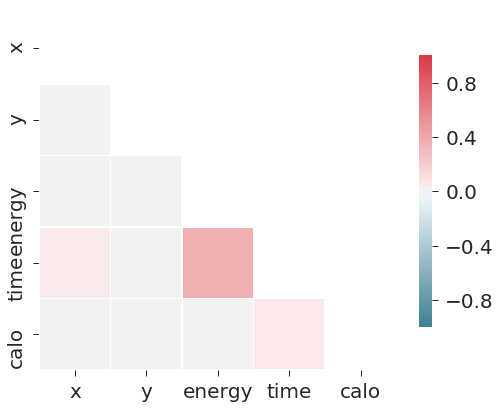

In [9]:
corr = dfUnpacked.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

plt.show()

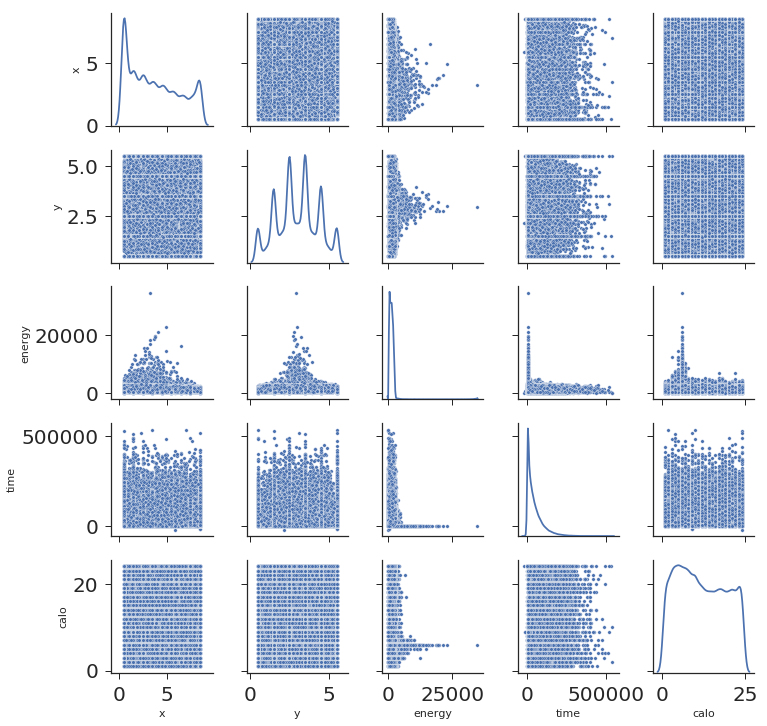

In [15]:
g = sns.pairplot(data = dfUnpacked.loc[dfUnpacked['energy']<40000].sample(n=100000,random_state=123456789), 
                 kind='scatter', markers='.',diag_kind="kde")
g.fig.set_size_inches(10,10)
plt.show()